### Testing of the code during development

Looking at the M1-1 dataset

In [5]:
import os
import glob
from oyv.imports import *
import importlib

In [6]:
ls

'Basic testing during development.ipynb'*


In [7]:
%matplotlib inline

In [9]:
# Load the modules
#os.chdir('../../')
from sigpyproc import sig_funcs, sig_append_external
os.chdir('testing/development/')

ModuleNotFoundError: No module named 'sig_funcs'

In [10]:
# Load converted data from M1-1
floc = '/media/oyvindl/ratatosk/data/mooring_data/signature500/m1_1/converted/*'
flist = glob.glob(floc)
for fn in flist:
    if '_avgd' in fn:
        flist.remove(fn)

In [24]:
# RELOAD the sig_func module
os.chdir('../../code/')
importlib.reload(sig_funcs)
os.chdir('../testing/basic_test/')

In [14]:
DX = sig_funcs.matfiles_to_dataset(flist, )

/home/oyvindl/work/code/git_public/signature_proc/code/sig_funcs.py:505: RuntimeWarning: invalid value encountered in sqrt
  d['tilt_Average'].attrs  =  tilt_attrs
/home/oyvindl/work/code/git_public/signature_proc/code/sig_funcs.py:514: RuntimeWarning: invalid value encountered in sqrt
  d['tilt_AverageIce'].attrs  = tilt_attrs


1870992 time points, 38979 ensembles. Sample per ensemble: 48
Done. Run sig_funcs.overview() to print some additional details.


In [15]:
DX.sampling_interval_sec

1.0

In [22]:
DX.Plan_ProfileInterval/60

15.0

In [25]:
## Print some stuff with the overview() function
sig_funcs.overview(DX)


TIME RANGE:
06 Oct 2018 12:00  -->  16 Nov 2019 12:30  (406.0 days)
Time between ensembles: 15.0 min.
Time between samples in ensembles: 1.0 sec.

PRESSURE:
Median (STD) of altimeter pressure: 20.6 dbar (0.5 dbar)  - with fixed atm offset 9.500 dbar

SIZE:
Total 1870992 time points.
Split into 38979 ensembles with 48 sample per ensemble.
Ocean velocity bins: 16.


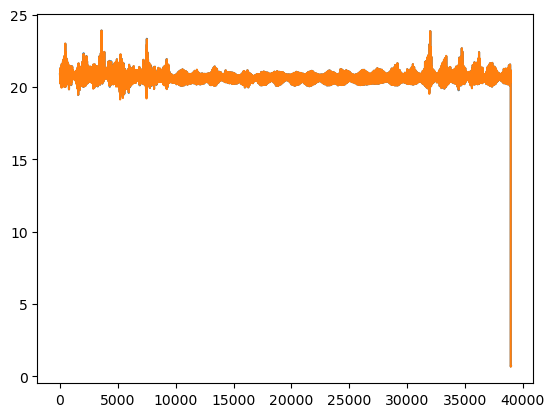

In [29]:
fig, ax = plt.subplots()
ax.plot(DX.Average_AltimeterPressure[:, 0])
ax.plot(DX.Average_Pressure[:, 0])
ax.set_ylim()

In [ ]:
DX.A

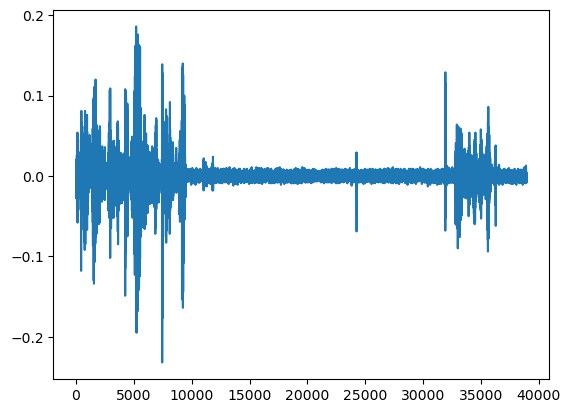

In [30]:
fig, ax = plt.subplots()
ax.plot(DX.Average_AltimeterPressure[:, 0]-DX.Average_Pressure[:, 0])

### Check that the time looks reasonable

In [19]:
DX.dims['TIME']

38979

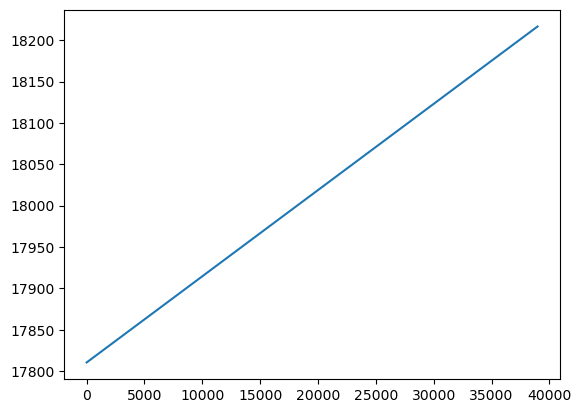

In [20]:
fig, ax = plt.subplots()
ax.plot(DX['TIME'])

In [ ]:
from matplotlib.dates import num2date 

In [ ]:
def overview(DX):
    '''
    Prints some basic information about the dataset.
    '''

    # Time range
    datefmt = '%d %b %Y %H:%M'
    starttime = num2date(DX.TIME[0]).strftime(datefmt)
    endtime = num2date(DX.TIME[-1]).strftime(datefmt)
    ndays = DX.TIME[-1]-DX.TIME[0]

    print('\nTIME RANGE:\n%s  -->  %s  (%.1f days)'%(
        starttime, endtime, ndays))

    # Size
    print('\nSIZE:\nTotal %i time points.'%(DX.dims['TIME']*DX.dims['SAMPLE']))
    print('Split into %i ensembles with %i sample per ensemble.'%(
          DX.dims['TIME'], DX.dims['SAMPLE']))
    print('Ocean velocity bins: %i.'%(DX.dims['bins']))

In [ ]:
DX.conf

In [ ]:
overview(DX)

In [ ]:
num2date(DX.TIME[0])

In [ ]:
DX = sig_funcs.matfiles_to_dataset(flist, reshape = False)

In [ ]:
DXX = sig_funcs.reshape_ensembles(DX)

In [ ]:
os.chdir('../testing/basic_test/')

In [ ]:
ls